In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
x=np.asarray([i for i in range(1,21)])

In [3]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [4]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [5]:
y1=np.round(np.sin(x*np.pi/3),2)

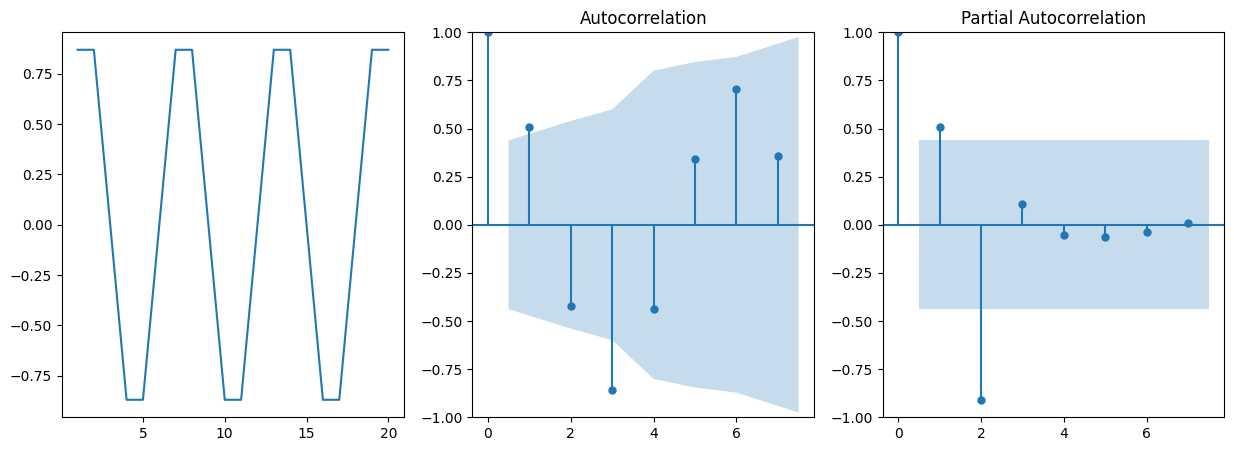

In [13]:
fig,axes=plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,y1);
plot_acf(y1,lags=7,ax=axes[1]);
plot_pacf(y1,lags=7,ax=axes[2]);

In [7]:
y2=-x

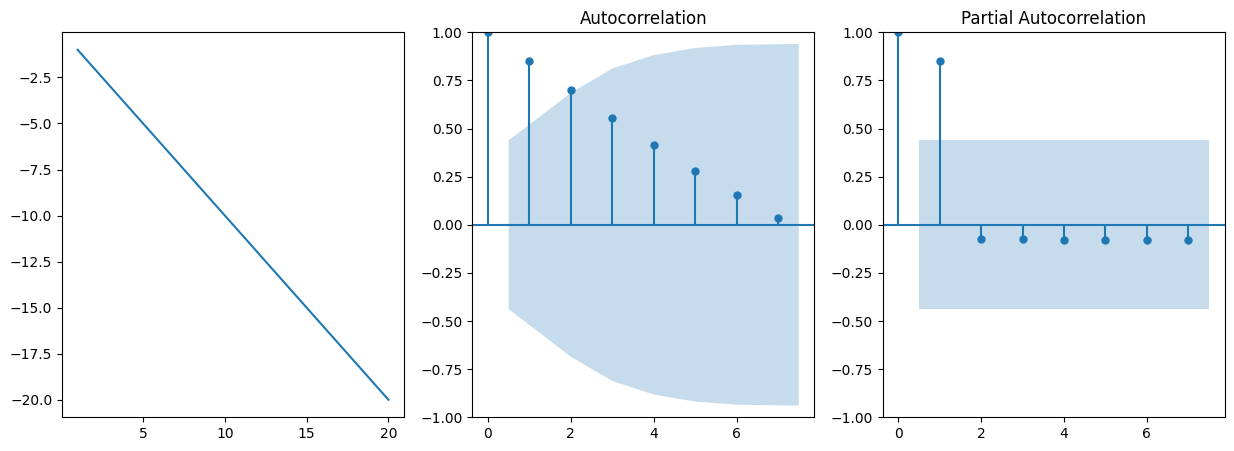

In [14]:
fig,axes=plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,y2);
plot_acf(y2,lags=7,ax=axes[1]);
plot_pacf(y2,lags=7,ax=axes[2]);

In [27]:
y3=np.random.random(20)

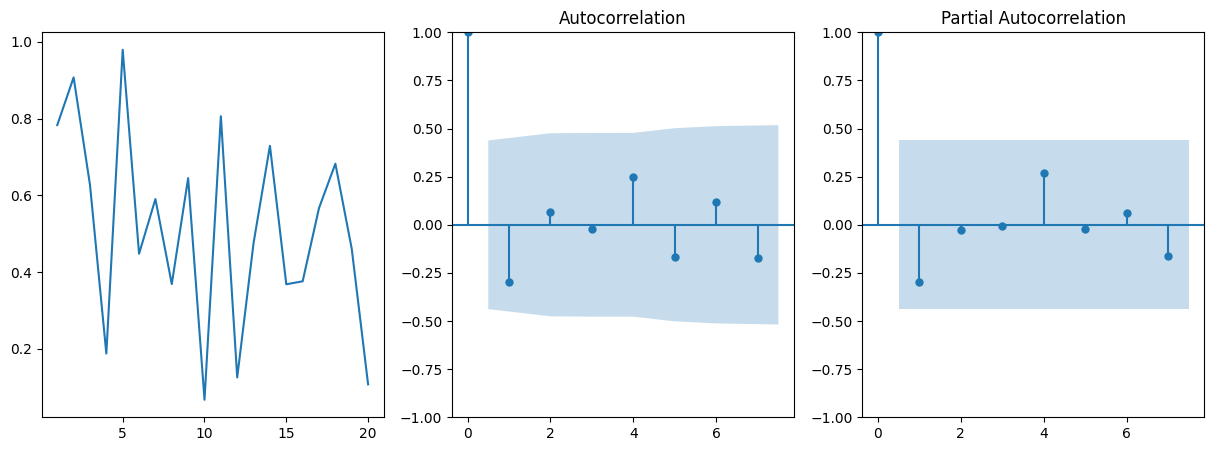

In [28]:
fig,axes=plt.subplots(1,3)
fig.set_size_inches(15,5)
axes[0].plot(x,y3);
plot_acf(y3,lags=7,ax=axes[1]);
plot_pacf(y3,lags=7,ax=axes[2]);

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
result=adfuller(y1)
print("ADF: {0}, p_value: {1}".format(result[0],result[1]))

ADF: -7332993604108922.0, p_value: 0.0


In [31]:
result=adfuller(y2)
print("ADF: {0}, p_value: {1}".format(result[0],result[1]))

ADF: -1.7589059099337863, p_value: 0.40104604148785605


In [32]:
result=adfuller(y3)
print("ADF: {0}, p_value: {1}".format(result[0],result[1]))

ADF: -1.870214955220069, p_value: 0.34620000956057617


In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [34]:
modelo=ARIMA(y1,order=(1,0,1))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 0.16214547944804542


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  -9.579
Date:                Wed, 20 Nov 2024   AIC                             27.157
Time:                        21:15:46   BIC                             31.140
Sample:                             0   HQIC                            27.935
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1535      0.305      0.502      0.615      -0.445       0.752
ar.L1          0.4962      0.294      1.688      0.091      -0.080       1.072
ma.L1          0.9998    235.712      0.004      0.997    -460.987     462.986
sigma2         0.1243     29.310      0.004      0.997     -57.323      57.572
===================================================================================
Ljung-Box (L1) (Q):                   4.83   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.03   Prob(JB):                         0.39
Heteroskedasticity (H):               0.81   Skew:                            -0.16
Prob(H) (two-sided):                  0.79   Kurtosis:                         1.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
x_p=[i+len(x)+1 for i in range(len(x))]

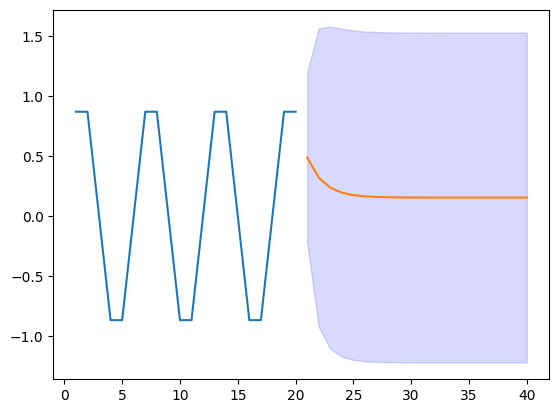

In [36]:
modelo_pred=predictor.get_forecast(steps=len(y1))
modelo_ci=modelo_pred.conf_int(0.05)
plt.plot(x,y1,x_p,modelo_pred.predicted_mean)
plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)

In [37]:
modelo=ARIMA(y1,order=(2,0,3))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 0.04730505877862737


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 0, 3)   Log Likelihood                 135.919
Date:                Wed, 20 Nov 2024   AIC                           -257.837
Time:                        21:20:04   BIC                           -250.867
Sample:                             0   HQIC                          -256.477
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.031e-06      0.000      0.018      0.986      -0.000       0.000
ar.L1          1.0001      0.001   1277.097      0.000       0.999       1.002
ar.L2         -1.0000   7.99e-07  -1.25e+06      0.000      -1.000      -1.000
ma.L1          1.0000   2.16e-07   4.63e+06      0.000       1.000       1.000
ma.L2         -1.0000   2.16e-07  -4.63e+06      0.000      -1.000      -1.000
ma.L3         -1.0000   2.16e-07  -4.64e+06      0.000      -1.000      -1.000
sigma2      9.555e-09   6.85e-09      1.394      0.163   -3.88e-09     2.3e-08
===================================================================================
Ljung-Box (L1) (Q):                   3.82   Jarque-Bera (JB):                72.80
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                             2.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.5e+23. Standard errors may be unstable.
"""

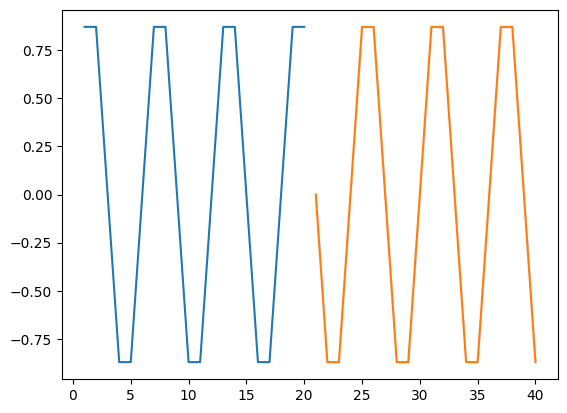

In [38]:
modelo_pred=predictor.get_forecast(steps=len(y1))
modelo_ci=modelo_pred.conf_int(0.05)
plt.plot(x,y1,x_p,modelo_pred.predicted_mean)
plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)

In [39]:
modelo=ARIMA(y2,order=(1,0,1))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 4.816027350537974


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -19.452
Date:                Wed, 20 Nov 2024   AIC                             46.903
Time:                        21:25:37   BIC                             50.886
Sample:                             0   HQIC                            47.681
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4998      9.717     -1.081      0.280     -29.545       8.545
ar.L1          0.9943      0.047     21.138      0.000       0.902       1.087
ma.L1          0.9997    238.107      0.004      0.997    -465.682     467.682
sigma2         0.2630     62.528      0.004      0.997    -122.290     122.816
===================================================================================
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):               180.78
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             3.67
Prob(H) (two-sided):                  0.98   Kurtosis:                        15.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

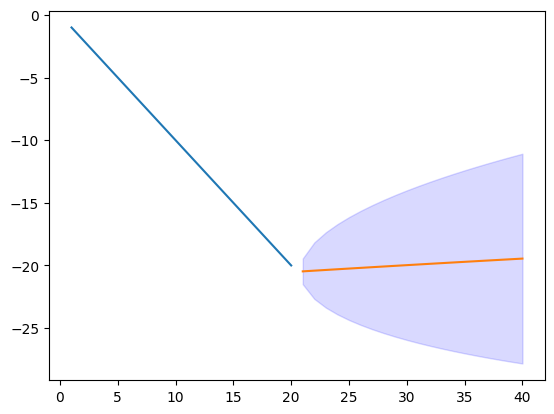

In [41]:
modelo_pred=predictor.get_forecast(steps=len(y2))
modelo_ci=modelo_pred.conf_int(0.05)
plt.plot(x,y2,x_p,modelo_pred.predicted_mean)
plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)

In [42]:
modelo=ARIMA(y2,order=(1,1,1))
predictor=modelo.fit()
print("MSE",predictor.mse)
predictor.summary()

MSE 0.09999999663478788


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  89.574
Date:                Wed, 20 Nov 2024   AIC                           -173.148
Time:                        21:29:34   BIC                           -170.314
Sample:                             0   HQIC                          -172.668
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999   4.38e-05   2.28e+04      0.000       1.000       1.000
ma.L1          0.9997   4.82e-12   2.07e+11      0.000       1.000       1.000
sigma2      2.495e-06   1.18e-06      2.123      0.034    1.92e-07     4.8e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               207.23
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -4.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.99e+25. Standard errors may be unstable.
"""

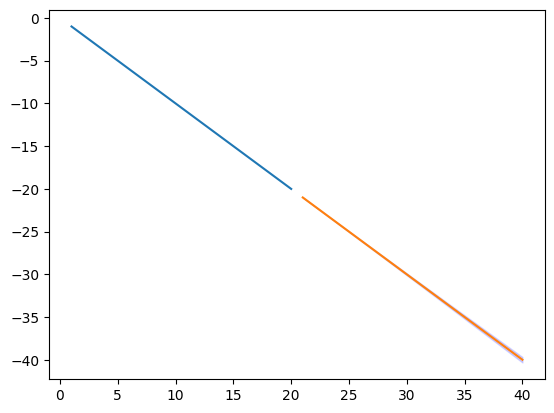

In [43]:
modelo_pred=predictor.get_forecast(steps=len(y2))
modelo_ci=modelo_pred.conf_int(0.05)
plt.plot(x,y2,x_p,modelo_pred.predicted_mean)
plt.fill_between(x_p,modelo_ci[:,0],modelo_ci[:,1],color="b",alpha=.15)

In [44]:
df=pd.read_csv("dolar.csv",sep=";")

In [45]:
valores=df["valor"].to_numpy()

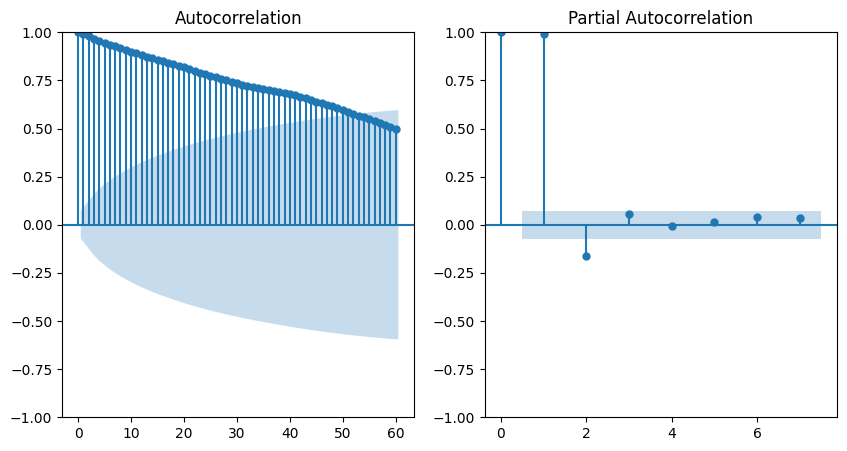

In [51]:
fig, axes=plt.subplots(1,2)
fig.set_size_inches(10,5)
plot_acf(valores,lags=60,ax=axes[0]);
plot_pacf(valores,lags=7,ax=axes[1]);